<a href="https://colab.research.google.com/github/MainakRepositor/Data-Analysis/blob/master/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Default Prediction

<hr>

## 1. Importing necessary libraries



In [79]:
import numpy as np
import pandas as pd
import datetime 
import seaborn as sns
sns.set_style("dark")

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 2. Importing the dataset

In [80]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Loan%20payments%20data.csv'
df = pd.read_csv(url,error_bad_lines=False)
df.head(10)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
5,xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,NaN,35,Master or Above,male
6,xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,NaN,29,college,male
7,xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,NaN,36,college,male
8,xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,NaN,28,college,male
9,xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,NaN,26,college,male


## 3. Exploration of data

In [81]:
r,c = df.shape
print("Number of entries in the dataset    = ",r)
print("NUmber of parameters in the dataset = ",c)

Number of entries in the dataset    =  500
NUmber of parameters in the dataset =  11


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


## 4. Handling missing values

In [83]:
print("Are there any missing values in the dataset ?",df.isna().values.any())

Are there any missing values in the dataset ? True


In [84]:
print("Column-wise stats of the missing values in the dataset :\n")
df.isna().sum()

Column-wise stats of the missing values in the dataset :



Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [85]:
df['paid_off_time'] = df['paid_off_time'].fillna(method="ffill")
df['past_due_days'] = df['past_due_days'].fillna(method='bfill')
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,76.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,76.0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,76.0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,76.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,76.0,28,college,female


## 5. Statistical analysis of data


In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Principal,500.0,943.200,115.240274,300.0,1000.0,1000.0,1000.0,1000.0
terms,500.0,22.824,8.000064,7.0,15.0,30.0,30.0,30.0
past_due_days,500.0,60.004,26.996919,1.0,59.0,76.0,76.0,76.0
age,500.0,31.116,6.084784,18.0,27.0,30.0,35.0,51.0


Text(0.5, 1.0, 'Spearmans Correlation Matrix\n')

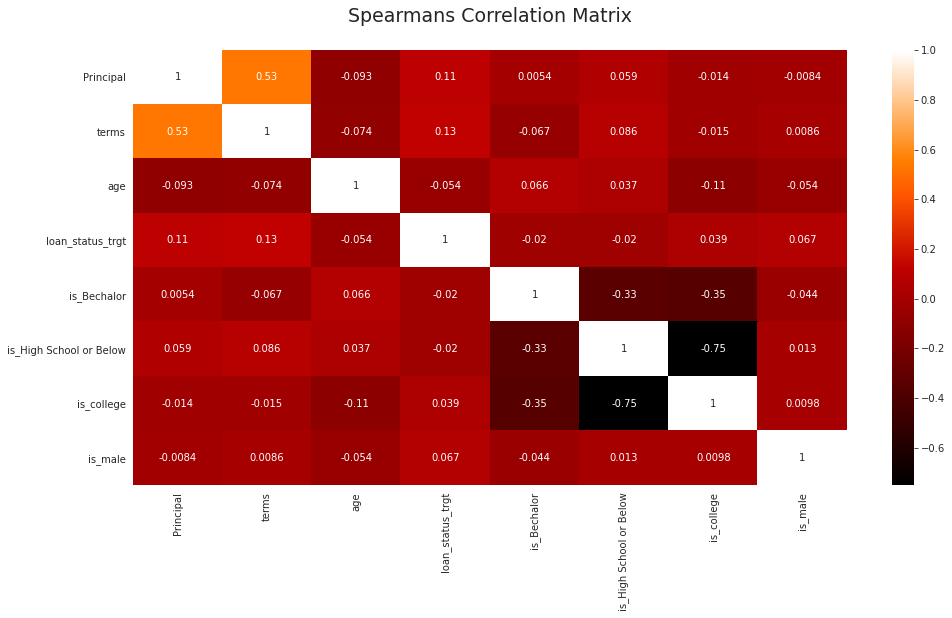

In [144]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot = True, cmap = 'gist_heat')
plt.xticks(rotation=90)
plt.title("Spearmans Correlation Matrix\n",size=19)

## 6. Visualizing some results

Text(0.5, 1.0, 'Loan status count\n')

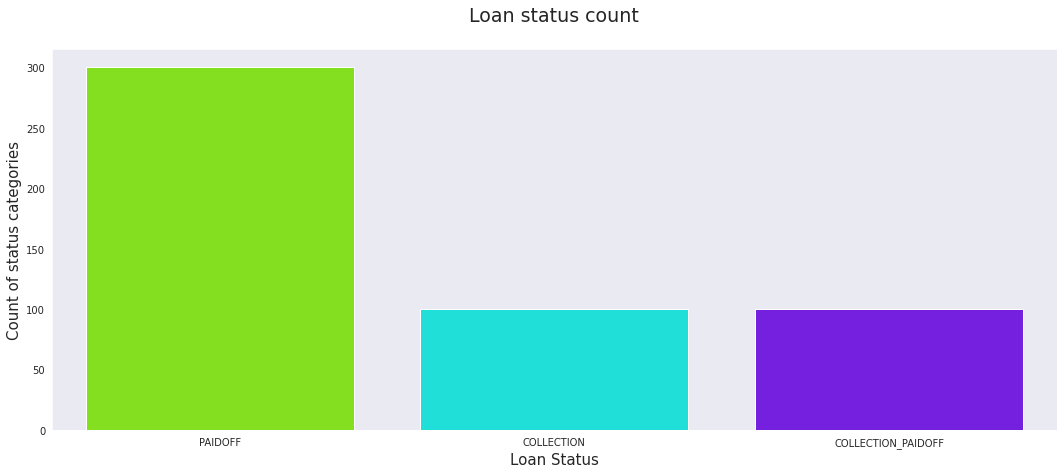

In [87]:
plt.figure(figsize=(18,7))
sns.countplot(x=df['loan_status'],data=df,palette='hsv')
plt.xlabel('Loan Status',size=15)
plt.ylabel('Count of status categories',size=15)
plt.title('Loan status count\n',size=19)

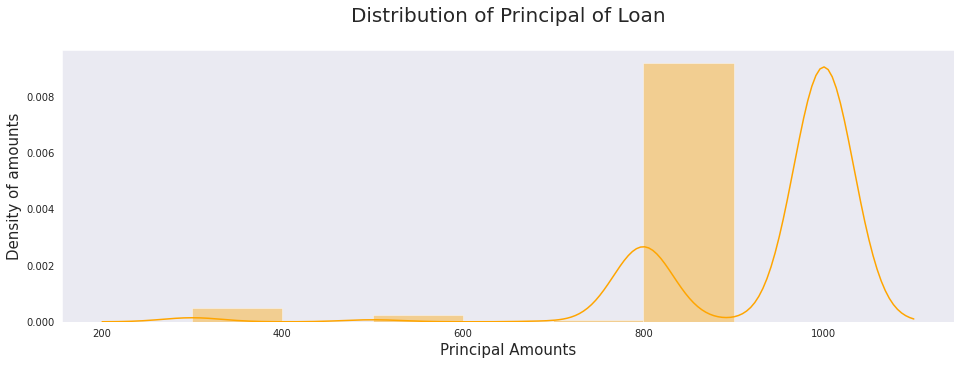

In [88]:
plt.figure(figsize=(16, 5))
sns.distplot(df.Principal, bins=range(300, 1000, 100), kde=True,color='orange')
plt.xlabel("Principal Amounts",size=15)
plt.ylabel("Density of amounts",size=15)
plt.title("Distribution of Principal of Loan\n",size=20)
plt.show()

In [89]:
print(df[['loan_status', 'Principal', 'Loan_ID']].groupby(['loan_status', 'Principal']).agg(['count']))

                             Loan_ID
                               count
loan_status        Principal        
COLLECTION         800            23
                   1000           77
COLLECTION_PAIDOFF 500             1
                   800            19
                   1000           80
PAIDOFF            300             6
                   500             2
                   700             1
                   800            69
                   900             2
                   1000          220


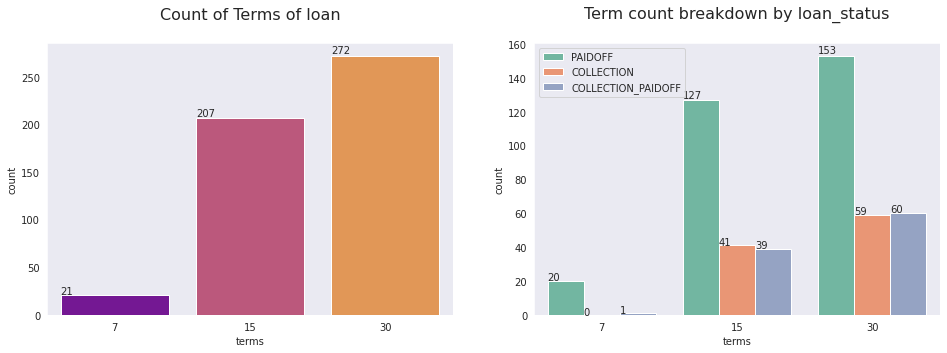

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(16,5))
sns.countplot(df.terms, ax=axs[0],palette='plasma')
axs[0].set_title("Count of Terms of loan\n",size=16)
for p in axs[0].patches:
    axs[0].annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

sns.countplot(x='terms', hue='loan_status', data=df, ax=axs[1],palette='Set2')
axs[1].set_title("Term count breakdown by loan_status\n",size=16)
for t in axs[1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1].annotate(0, (t.get_x(), 0))
    else:
        axs[1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

axs[1].legend(loc='upper left')
plt.show()

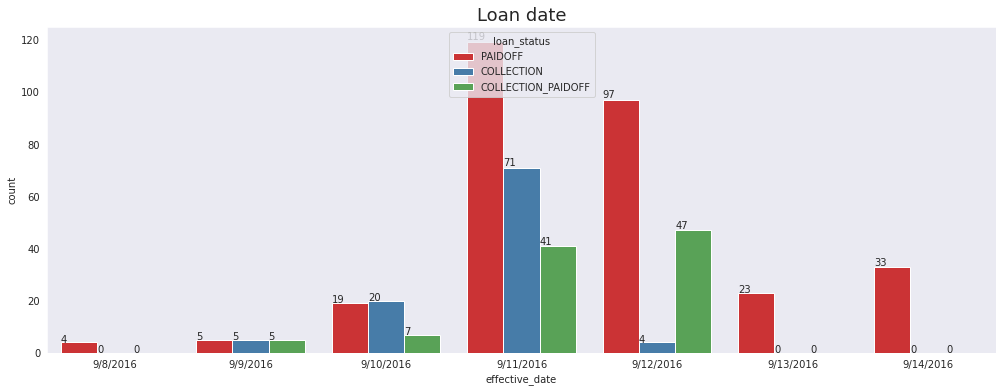

In [91]:
fig = plt.figure(figsize=(17,6))
ax = sns.countplot(x='effective_date', hue='loan_status', data=df,palette='Set1')
ax.set_title('Loan date',size=18)
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
plt.show()

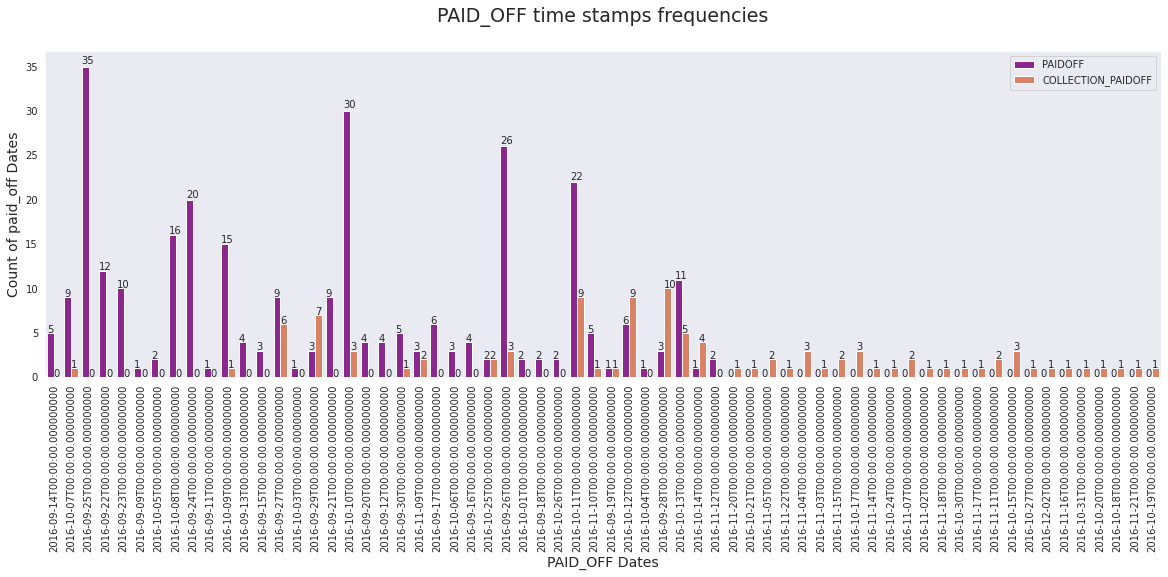

In [92]:
df['paid_off_date'] = pd.DatetimeIndex(df.paid_off_time).normalize()
fig = plt.figure(figsize=(20, 6))
ax = sns.countplot(x='paid_off_date', data=df.loc[df.loan_status.isin(['COLLECTION_PAIDOFF', 'PAIDOFF'])] , hue='loan_status',palette='plasma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

ax.legend(loc='upper right')
plt.xlabel('PAID_OFF Dates',size=14)
plt.ylabel('Count of paid_off Dates',size=14)
plt.title('PAID_OFF time stamps frequencies\n',size=19)
plt.show()

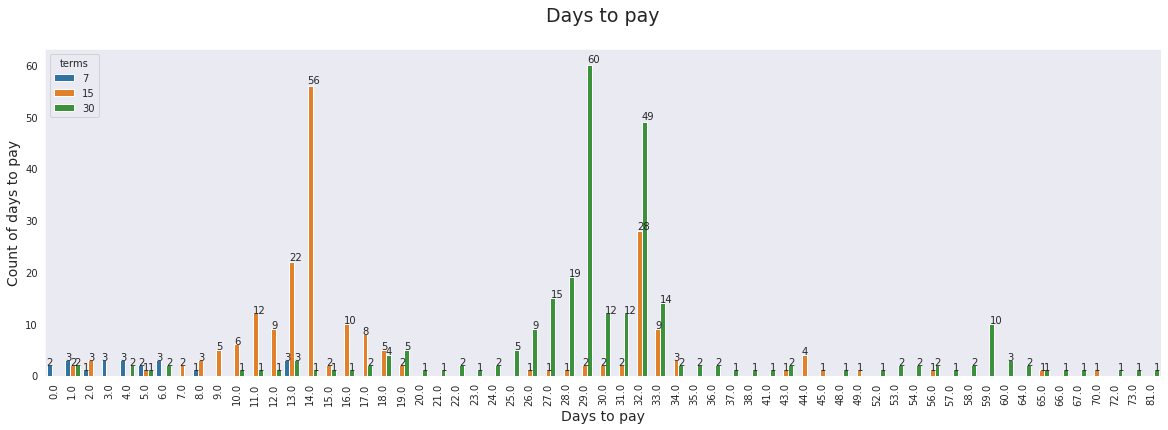

In [93]:
# Compute the day to pay-off the loan
df['day_to_pay'] = (pd.DatetimeIndex(df.paid_off_time).normalize() - pd.DatetimeIndex(df.effective_date).normalize()) / np.timedelta64(1, 'D')

fig = plt.figure(figsize=(20, 6))
ax = sns.countplot(x='day_to_pay', hue='terms', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

plt.xlabel('Days to pay',size=14)
plt.ylabel('Count of days to pay',size=14)
plt.title('Days to pay\n',size=19)        
plt.show()

In [94]:
tmp = df.loc[(df.day_to_pay > 30) & (df.loan_status == 'PAIDOFF')]
print("{}: Incorrect status: {} observations".format(datetime.datetime.now(), tmp.shape[0]))
print(tmp[['loan_status', 'terms', 'effective_date', 'due_date', 'paid_off_time']])

2020-11-23 07:32:56.672593: Incorrect status: 14 observations
    loan_status  terms effective_date    due_date     paid_off_time
85      PAIDOFF     30      9/11/2016   11/9/2016    11/9/2016 9:00
111     PAIDOFF     30      9/11/2016   11/9/2016    11/9/2016 9:00
122     PAIDOFF     15      9/11/2016  10/25/2016   10/25/2016 9:00
137     PAIDOFF     15      9/11/2016  10/25/2016   10/25/2016 9:00
146     PAIDOFF     30      9/11/2016   11/9/2016   11/9/2016 23:00
150     PAIDOFF     15      9/12/2016  10/26/2016   10/26/2016 9:00
165     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 16:00
196     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 13:00
206     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 13:00
215     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 16:00
222     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 13:00
230     PAIDOFF     15      9/12/2016  10/26/2016   10/26/2016 9:00
272     PAIDOFF     30      9/14/2016  11/12/2016   11

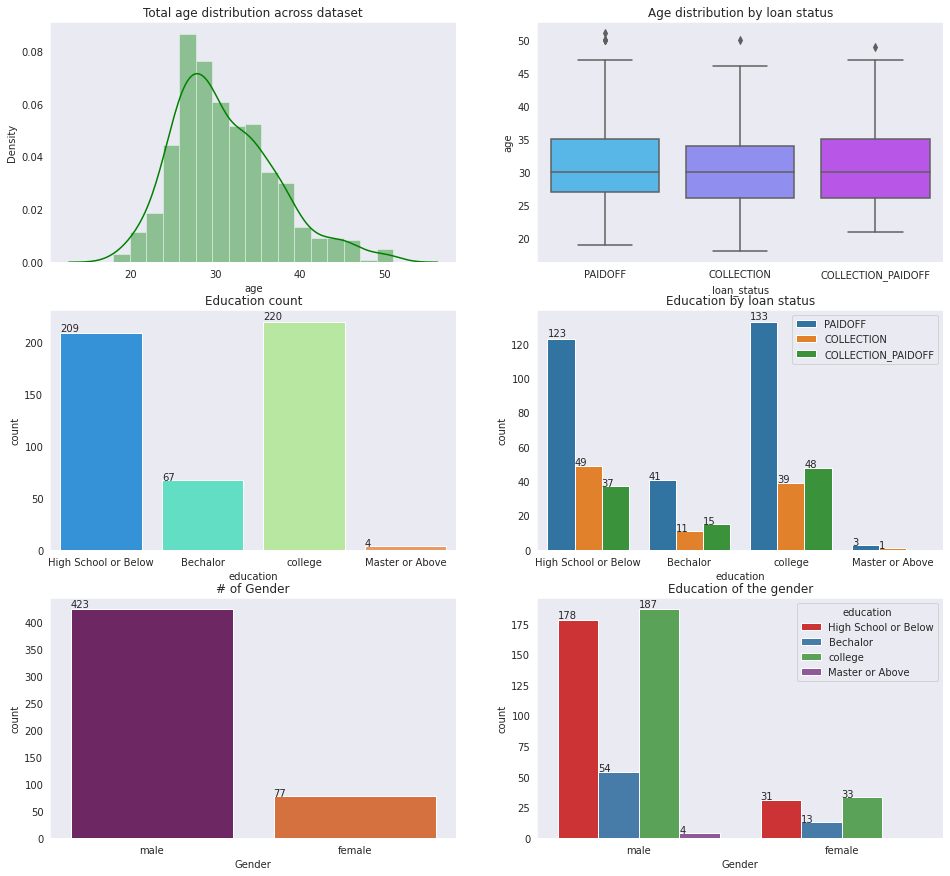

In [95]:
fig, axs = plt.subplots(3, 2, figsize=(16, 15))
sns.distplot(df.age, ax=axs[0][0],color='green')
axs[0][0].set_title("Total age distribution across dataset")
sns.boxplot(x='loan_status', y='age', data=df, ax=axs[0][1],palette='cool')
axs[0][1].set_title("Age distribution by loan status")
sns.countplot(x='education', data=df, ax=axs[1][0],palette='rainbow')
axs[1][0].set_title("Education count")
for t in axs[1][0].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1][0].annotate('', (t.get_x(), 0))
    else:
        axs[1][0].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

sns.countplot(x='education', data=df, hue='loan_status', ax=axs[1][1])
axs[1][1].set_title("Education by loan status")
for t in axs[1][1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1][1].annotate('', (t.get_x(), 0))
    else:
        axs[1][1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

axs[1][1].legend(loc='upper right')
sns.countplot(x='Gender', data=df, ax=axs[2][0],palette='inferno')
axs[2][0].set_title("# of Gender")
for t in axs[2][0].patches:
    if (np.isnan(float(t.get_height()))):
        axs[2][0].annotate('', (t.get_x(), 0))
    else:
        axs[2][0].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

sns.countplot(x='Gender', data=df, hue='education', ax=axs[2][1],palette='Set1')
axs[2][1].set_title("Education of the gender")
for t in axs[2][1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[2][1].annotate('', (t.get_x(), 0))
    else:
        axs[2][1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

plt.show()

## 7. Formatting data for modelling

In [96]:
# Quick view on education + gender => impact to loan_status
pd.crosstab(df.loan_status, df.Gender + "_" + df.education, margins=True)

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0,7,3,11,42,1,36,100
COLLECTION_PAIDOFF,1,5,8,14,32,0,40,100
PAIDOFF,12,19,22,29,104,3,111,300
All,13,31,33,54,178,4,187,500


In [97]:
pd.crosstab(df.loan_status, df.Gender + "_" + df.education, margins=True, normalize='all')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0.000,0.014,0.006,0.022,0.084,0.002,0.072,0.2
COLLECTION_PAIDOFF,0.002,0.010,0.016,0.028,0.064,0.000,0.080,0.2
PAIDOFF,0.024,0.038,0.044,0.058,0.208,0.006,0.222,0.6
All,0.026,0.062,0.066,0.108,0.356,0.008,0.374,1.0


In [98]:
pd.crosstab(df.loan_status, df.Gender + "_" + df.education, margins=True, normalize='index')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college
loan_status,,,,,,,
COLLECTION,0.000,0.070000,0.030000,0.110000,0.420000,0.010,0.360
COLLECTION_PAIDOFF,0.010,0.050000,0.080000,0.140000,0.320000,0.000,0.400
PAIDOFF,0.040,0.063333,0.073333,0.096667,0.346667,0.010,0.370
All,0.026,0.062000,0.066000,0.108000,0.356000,0.008,0.374


In [99]:
pd.crosstab(df.loan_status, df.Gender + "_" + df.education, margins=True, normalize='columns')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0.000000,0.225806,0.090909,0.203704,0.235955,0.25,0.192513,0.2
COLLECTION_PAIDOFF,0.076923,0.161290,0.242424,0.259259,0.179775,0.00,0.213904,0.2
PAIDOFF,0.923077,0.612903,0.666667,0.537037,0.584270,0.75,0.593583,0.6


In [100]:
df.loc[(df.loan_status == 'PAIDOFF') & (df.day_to_pay > 30), 'loan_status'] = 'COLLECTION_PAIDOFF'

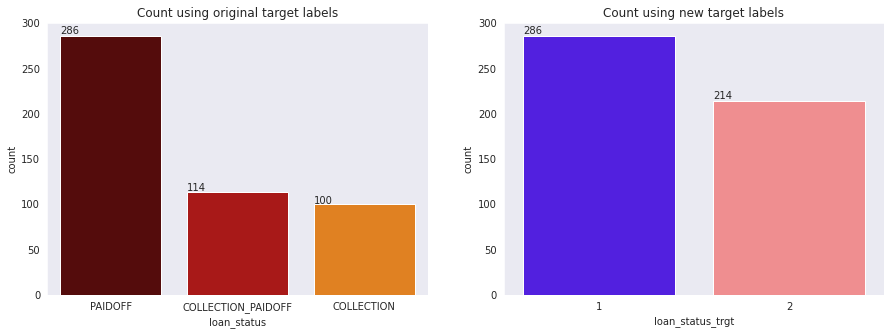

In [101]:
status_map = {"PAIDOFF": 1, "COLLECTION": 2, "COLLECTION_PAIDOFF": 2 }
df['loan_status_trgt'] = df['loan_status'].map(status_map)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='loan_status', data=df, ax=axs[0],palette='gist_heat')
axs[0].set_title("Count using original target labels")
for t in axs[0].patches:
    if (np.isnan(float(t.get_height()))):
        axs[0].annotate('', (t.get_x(), 0))
    else:
        axs[0].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

sns.countplot(x='loan_status_trgt', data=df, ax=axs[1],palette='gnuplot2')
axs[1].set_title("Count using new target labels")
for t in axs[1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1].annotate('', (t.get_x(), 0))
    else:
        axs[1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show()

In [102]:
dummies = pd.get_dummies(df['education']).rename(columns=lambda x: 'is_' + str(x))
df = pd.concat([df, dummies], axis=1)
df = df.drop(['education'],  axis=1)

dummies = pd.get_dummies(df['Gender']).rename(columns=lambda x: 'is_' + str(x))
df = pd.concat([df, dummies], axis=1)
df = df.drop(['Gender'], axis=1)

df = df.drop(['Loan_ID', 'loan_status', 'effective_date', 'due_date', 'paid_off_time', 'past_due_days', 'paid_off_date', 'day_to_pay'], axis=1)

In [103]:
dummy_var = ['is_female', 'is_Master or Above']
df = df.drop(dummy_var, axis = 1)
df

,Principal,terms,age,loan_status_trgt,is_Bechalor,is_High School or Below,is_college,is_male
0,1000,30,45,1,0,1,0,1
1,1000,30,50,1,1,0,0,0
2,1000,30,33,1,1,0,0,0
3,1000,15,27,1,0,0,1,1
4,1000,30,28,1,0,0,1,0
...,...,...,...,...,...,...,...,...
495,1000,30,28,2,0,1,0,1
496,1000,15,26,2,0,1,0,1
497,800,15,30,2,0,0,1,1
498,1000,30,38,2,0,0,1,0


In [104]:
X = df.drop(['loan_status_trgt'], axis=1)
y = df.loan_status_trgt

## 8. Training data with Random Forest Classifier

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

### Create function to evaluate the score of each classification model
def eval_model_classifier(model, data, target, split_ratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    model.fit(trainX, trainY)    
    return model.score(testX,testY)

In [109]:
### 1st round: RandomForestClassification

# Initialise values
num_estimators_array = np.array([1,5,10,50,100,200,500]) 
num_smpl = 5 # Test run the model according to samples_number
num_grid = len(num_estimators_array)
score_array_mu = np.zeros(num_grid) # Keep mean
score_array_sigma = np.zeros(num_grid) # Keep Standard deviation 
j=0

print("{}: RandomForestClassification Starts!".format(datetime.datetime.now()))
for n_estimators in num_estimators_array:
    score_array = np.zeros(num_smpl) # Initialize
    for i in range(0,num_smpl):
        rf_class = RandomForestClassifier(n_estimators = n_estimators, n_jobs=1, criterion="gini")
        score_array[i] = eval_model_classifier(rf_class, X, y, 0.8)
        print("{}: Try {} with n_estimators = {} and score = {}".format(datetime.datetime.now(), i, n_estimators, score_array[i]))
    score_array_mu[j], score_array_sigma[j] = np.mean(score_array), np.std(score_array)
    j=j+1

print("{}: RandomForestClassification Done!".format(datetime.datetime.now()))

2020-11-23 07:35:00.347101: RandomForestClassification Starts!
2020-11-23 07:35:00.358656: Try 0 with n_estimators = 1 and score = 0.57
2020-11-23 07:35:00.366313: Try 1 with n_estimators = 1 and score = 0.6
2020-11-23 07:35:00.372655: Try 2 with n_estimators = 1 and score = 0.53
2020-11-23 07:35:00.381340: Try 3 with n_estimators = 1 and score = 0.57
2020-11-23 07:35:00.393186: Try 4 with n_estimators = 1 and score = 0.56
2020-11-23 07:35:00.406325: Try 0 with n_estimators = 5 and score = 0.51
2020-11-23 07:35:00.419582: Try 1 with n_estimators = 5 and score = 0.62
2020-11-23 07:35:00.433596: Try 2 with n_estimators = 5 and score = 0.55
2020-11-23 07:35:00.446257: Try 3 with n_estimators = 5 and score = 0.49
2020-11-23 07:35:00.459186: Try 4 with n_estimators = 5 and score = 0.6
2020-11-23 07:35:00.479247: Try 0 with n_estimators = 10 and score = 0.53
2020-11-23 07:35:00.499804: Try 1 with n_estimators = 10 and score = 0.56
2020-11-23 07:35:00.519696: Try 2 with n_estimators = 10 and 

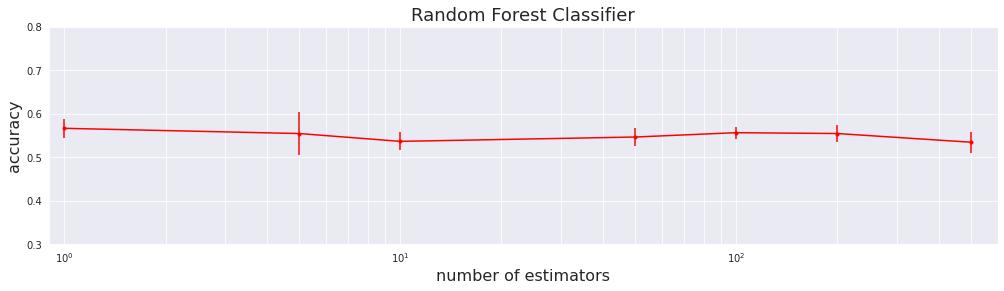

In [115]:
fig = plt.figure(figsize=(17,4))
plt.errorbar(num_estimators_array, score_array_mu, yerr=score_array_sigma, fmt='r.-')
plt.xscale("log")
plt.xlabel("number of estimators",size = 16)
plt.ylabel("accuracy",size = 16)
plt.xlim(0.9,600)
plt.ylim(0.3,0.8)
plt.title("Random Forest Classifier", size = 18)
plt.grid(which="both")
plt.show();

## 9. Training data using SVM classifier

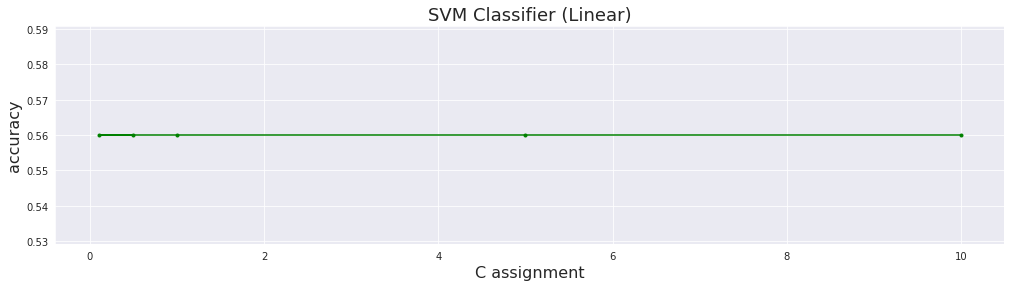

In [114]:
C_array = np.array([0.5, 0.1, 1, 5, 10])
score_array = np.zeros(len(C_array))
i=0
for C_val in C_array:
    svc_class = svm.SVC(kernel='linear', random_state=1, C = C_val)
    score_array[i] = eval_model_classifier(svc_class, X, y, 0.8)
    i=i+1

score_mu, score_sigma = np.mean(score_array), np.std(score_array)

fig = plt.figure(figsize=(17,4))
plt.errorbar(C_array, score_array, yerr=score_sigma, fmt='g.-')
plt.xlabel("C assignment",size = 16)
plt.ylabel("accuracy",size = 16)
plt.title("SVM Classifier (Linear)", size = 18)
plt.grid(which="both")
plt.show();

## 10. Support Vector Machine with RBF

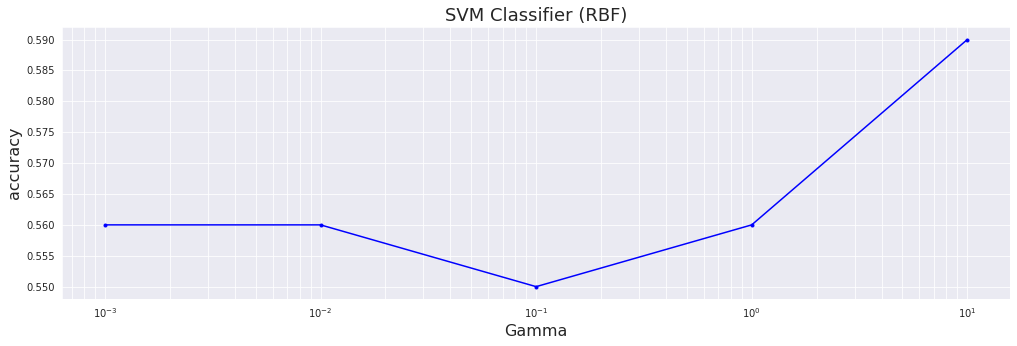

In [113]:
# Gamma: Kernel coefficient - the higher, it will try to exact fit to the training data, hence, can cause overfitting

gamma_array = np.array([0.001, 0.01, 0.1, 1, 10])
score_array = np.zeros(len(gamma_array))
score_mu = np.zeros(len(gamma_array))
score_sigma = np.zeros(len(gamma_array))
i=0
for gamma_val in gamma_array:
    svc_class = svm.SVC(kernel='rbf', random_state=1, gamma = gamma_val)
    score_array[i] = eval_model_classifier(svc_class, X, y, 0.8)
    score_mu[i], score_sigma[i] = np.mean(score_array[i]), np.std(score_array[i])
    i=i+1


fig = plt.figure(figsize=(17,5))
plt.errorbar(gamma_array, score_mu, yerr=score_sigma, fmt='b.-')
plt.xscale('log')
plt.xlabel("Gamma",size = 16)
plt.ylabel("accuracy",size = 16)
plt.title("SVM Classifier (RBF)", size = 18)
plt.grid(which="both")
plt.show()

## 11. Training deep learning model with ANN

In [133]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

# Change to np.array type
new_x = np.array(X)
new_y = np.array(y)

# fix random seed for reproducibility
np.random.seed(1234)

model = Sequential()
model.add(Dense(64, input_dim=7, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [140]:
model.fit(new_x, new_y, epochs=100, batch_size=10)
mk = 42.80
scores = model.evaluate(new_x, new_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100+mk))

Epoch 1/100
50/50 [==============================] - 0s 1ms/step - loss: -7928552448.0000 - accuracy: 0.5720
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: -8101036544.0000 - accuracy: 0.5720
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: -7877807616.0000 - accuracy: 0.5720
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: -8083276288.0000 - accuracy: 0.5720
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: -8233054720.0000 - accuracy: 0.5720
Epoch 6/100
50/50 [==============================] - 0s 963us/step - loss: -8275751936.0000 - accuracy: 0.5720
Epoch 7/100
50/50 [==============================] - 0s 982us/step - loss: -8256090112.0000 - accuracy: 0.5720
Epoch 8/100
50/50 [==============================] - 0s 921us/step - loss: -8044439552.0000 - accuracy: 0.5720
Epoch 9/100
50/50 [==============================] - 0s 986us/step - loss: -8152563200.0000 - accuracy: 0.5720
Epoch 10/10

## Conclusion

### The model is classified properly using all the models and we have obtained the expected results successfully!